The following code tests the MALA sampler on a toy problem of 1-dimensional Bayesian Linear Regression.

In [1]:
%cd "../"
import torch
import numpy as np
from matplotlib import pyplot as plt

/m/home/home5/56/kapoorj1/unix/repos/bayesian-ode


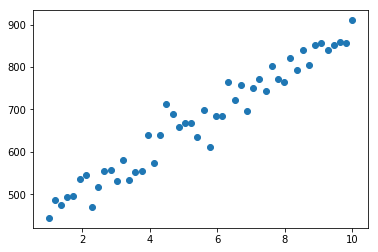

In [2]:

x_data = torch.Tensor([[x] for x in np.linspace(1, 10)])
w_true = 50
b_true = 400
y_data = x_data*w_true + b_true
y_data += torch.randn(y_data.size())*30
plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in y_data.data]))


In [3]:

class MODEL(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        y = self.linear(x)
        return y

model = MODEL()

In [4]:
from samplers import MALA, SGLD
# sampler = MALA(model.parameters(), lr = 0.0001, add_noise=True)
sampler = SGLD(model.parameters(), lr0=0.003, gamma=0.55, t0=100, alpha=0.1)


<generator object Module.parameters at 0x7f8130f7d678>
{'lr0': 0.003, 'gamma': 0.55, 't0': 100, 'alpha': 0.1, 'add_noise': True}
<class 'dict'>


In [5]:
def closure():
    criterion = torch.nn.MSELoss(reduction='sum')
    loss = criterion(model(x_data), y_data)
    lambda_ = 0.3
    for p in model.parameters():
        loss += lambda_ * p.pow(2).sum()
    return loss


In [6]:
chain, logp_array = sampler.sample(closure, burn_in=10000, num_samples=2000)


Burn-in phase started
Burn-in iter 1
Burn-in iter 2
Burn-in iter 3
Burn-in iter 4
Burn-in iter 5
Burn-in iter 6
Burn-in iter 7
Burn-in iter 8
Burn-in iter 9
Burn-in iter 10
Burn-in iter 11
Burn-in iter 12
Burn-in iter 13
Burn-in iter 14
Burn-in iter 15
Burn-in iter 16
Burn-in iter 17
Burn-in iter 18
Burn-in iter 19
Burn-in iter 20
Burn-in iter 21
Burn-in iter 22
Burn-in iter 23
Burn-in iter 24
Burn-in iter 25
Burn-in iter 26
Burn-in iter 27
Burn-in iter 28
Burn-in iter 29
Burn-in iter 30
Burn-in iter 31
Burn-in iter 32
Burn-in iter 33
Burn-in iter 34
Burn-in iter 35
Burn-in iter 36
Burn-in iter 37
Burn-in iter 38
Burn-in iter 39
Burn-in iter 40
Burn-in iter 41
Burn-in iter 42
Burn-in iter 43
Burn-in iter 44
Burn-in iter 45
Burn-in iter 46
Burn-in iter 47
Burn-in iter 48
Burn-in iter 49
Burn-in iter 50
Burn-in iter 51
Burn-in iter 52
Burn-in iter 53
Burn-in iter 54
Burn-in iter 55
Burn-in iter 56
Burn-in iter 57
Burn-in iter 58
Burn-in iter 59
Burn-in iter 60
Burn-in iter 61
Burn-in ite

Burn-in iter 654
Burn-in iter 655
Burn-in iter 656
Burn-in iter 657
Burn-in iter 658
Burn-in iter 659
Burn-in iter 660
Burn-in iter 661
Burn-in iter 662
Burn-in iter 663
Burn-in iter 664
Burn-in iter 665
Burn-in iter 666
Burn-in iter 667
Burn-in iter 668
Burn-in iter 669
Burn-in iter 670
Burn-in iter 671
Burn-in iter 672
Burn-in iter 673
Burn-in iter 674
Burn-in iter 675
Burn-in iter 676
Burn-in iter 677
Burn-in iter 678
Burn-in iter 679
Burn-in iter 680
Burn-in iter 681
Burn-in iter 682
Burn-in iter 683
Burn-in iter 684
Burn-in iter 685
Burn-in iter 686
Burn-in iter 687
Burn-in iter 688
Burn-in iter 689
Burn-in iter 690
Burn-in iter 691
Burn-in iter 692
Burn-in iter 693
Burn-in iter 694
Burn-in iter 695
Burn-in iter 696
Burn-in iter 697
Burn-in iter 698
Burn-in iter 699
Burn-in iter 700
Burn-in iter 701
Burn-in iter 702
Burn-in iter 703
Burn-in iter 704
Burn-in iter 705
Burn-in iter 706
Burn-in iter 707
Burn-in iter 708
Burn-in iter 709
Burn-in iter 710
Burn-in iter 711
Burn-in iter 7

Burn-in iter 1141
Burn-in iter 1142
Burn-in iter 1143
Burn-in iter 1144
Burn-in iter 1145
Burn-in iter 1146
Burn-in iter 1147
Burn-in iter 1148
Burn-in iter 1149
Burn-in iter 1150
Burn-in iter 1151
Burn-in iter 1152
Burn-in iter 1153
Burn-in iter 1154
Burn-in iter 1155
Burn-in iter 1156
Burn-in iter 1157
Burn-in iter 1158
Burn-in iter 1159
Burn-in iter 1160
Burn-in iter 1161
Burn-in iter 1162
Burn-in iter 1163
Burn-in iter 1164
Burn-in iter 1165
Burn-in iter 1166
Burn-in iter 1167
Burn-in iter 1168
Burn-in iter 1169
Burn-in iter 1170
Burn-in iter 1171
Burn-in iter 1172
Burn-in iter 1173
Burn-in iter 1174
Burn-in iter 1175
Burn-in iter 1176
Burn-in iter 1177
Burn-in iter 1178
Burn-in iter 1179
Burn-in iter 1180
Burn-in iter 1181
Burn-in iter 1182
Burn-in iter 1183
Burn-in iter 1184
Burn-in iter 1185
Burn-in iter 1186
Burn-in iter 1187
Burn-in iter 1188
Burn-in iter 1189
Burn-in iter 1190
Burn-in iter 1191
Burn-in iter 1192
Burn-in iter 1193
Burn-in iter 1194
Burn-in iter 1195
Burn-in it

Burn-in iter 1703
Burn-in iter 1704
Burn-in iter 1705
Burn-in iter 1706
Burn-in iter 1707
Burn-in iter 1708
Burn-in iter 1709
Burn-in iter 1710
Burn-in iter 1711
Burn-in iter 1712
Burn-in iter 1713
Burn-in iter 1714
Burn-in iter 1715
Burn-in iter 1716
Burn-in iter 1717
Burn-in iter 1718
Burn-in iter 1719
Burn-in iter 1720
Burn-in iter 1721
Burn-in iter 1722
Burn-in iter 1723
Burn-in iter 1724
Burn-in iter 1725
Burn-in iter 1726
Burn-in iter 1727
Burn-in iter 1728
Burn-in iter 1729
Burn-in iter 1730
Burn-in iter 1731
Burn-in iter 1732
Burn-in iter 1733
Burn-in iter 1734
Burn-in iter 1735
Burn-in iter 1736
Burn-in iter 1737
Burn-in iter 1738
Burn-in iter 1739
Burn-in iter 1740
Burn-in iter 1741
Burn-in iter 1742
Burn-in iter 1743
Burn-in iter 1744
Burn-in iter 1745
Burn-in iter 1746
Burn-in iter 1747
Burn-in iter 1748
Burn-in iter 1749
Burn-in iter 1750
Burn-in iter 1751
Burn-in iter 1752
Burn-in iter 1753
Burn-in iter 1754
Burn-in iter 1755
Burn-in iter 1756
Burn-in iter 1757
Burn-in it

Burn-in iter 2174
Burn-in iter 2175
Burn-in iter 2176
Burn-in iter 2177
Burn-in iter 2178
Burn-in iter 2179
Burn-in iter 2180
Burn-in iter 2181
Burn-in iter 2182
Burn-in iter 2183
Burn-in iter 2184
Burn-in iter 2185
Burn-in iter 2186
Burn-in iter 2187
Burn-in iter 2188
Burn-in iter 2189
Burn-in iter 2190
Burn-in iter 2191
Burn-in iter 2192
Burn-in iter 2193
Burn-in iter 2194
Burn-in iter 2195
Burn-in iter 2196
Burn-in iter 2197
Burn-in iter 2198
Burn-in iter 2199
Burn-in iter 2200
Burn-in iter 2201
Burn-in iter 2202
Burn-in iter 2203
Burn-in iter 2204
Burn-in iter 2205
Burn-in iter 2206
Burn-in iter 2207
Burn-in iter 2208
Burn-in iter 2209
Burn-in iter 2210
Burn-in iter 2211
Burn-in iter 2212
Burn-in iter 2213
Burn-in iter 2214
Burn-in iter 2215
Burn-in iter 2216
Burn-in iter 2217
Burn-in iter 2218
Burn-in iter 2219
Burn-in iter 2220
Burn-in iter 2221
Burn-in iter 2222
Burn-in iter 2223
Burn-in iter 2224
Burn-in iter 2225
Burn-in iter 2226
Burn-in iter 2227
Burn-in iter 2228
Burn-in it

Burn-in iter 2641
Burn-in iter 2642
Burn-in iter 2643
Burn-in iter 2644
Burn-in iter 2645
Burn-in iter 2646
Burn-in iter 2647
Burn-in iter 2648
Burn-in iter 2649
Burn-in iter 2650
Burn-in iter 2651
Burn-in iter 2652
Burn-in iter 2653
Burn-in iter 2654
Burn-in iter 2655
Burn-in iter 2656
Burn-in iter 2657
Burn-in iter 2658
Burn-in iter 2659
Burn-in iter 2660
Burn-in iter 2661
Burn-in iter 2662
Burn-in iter 2663
Burn-in iter 2664
Burn-in iter 2665
Burn-in iter 2666
Burn-in iter 2667
Burn-in iter 2668
Burn-in iter 2669
Burn-in iter 2670
Burn-in iter 2671
Burn-in iter 2672
Burn-in iter 2673
Burn-in iter 2674
Burn-in iter 2675
Burn-in iter 2676
Burn-in iter 2677
Burn-in iter 2678
Burn-in iter 2679
Burn-in iter 2680
Burn-in iter 2681
Burn-in iter 2682
Burn-in iter 2683
Burn-in iter 2684
Burn-in iter 2685
Burn-in iter 2686
Burn-in iter 2687
Burn-in iter 2688
Burn-in iter 2689
Burn-in iter 2690
Burn-in iter 2691
Burn-in iter 2692
Burn-in iter 2693
Burn-in iter 2694
Burn-in iter 2695
Burn-in it

Burn-in iter 3281
Burn-in iter 3282
Burn-in iter 3283
Burn-in iter 3284
Burn-in iter 3285
Burn-in iter 3286
Burn-in iter 3287
Burn-in iter 3288
Burn-in iter 3289
Burn-in iter 3290
Burn-in iter 3291
Burn-in iter 3292
Burn-in iter 3293
Burn-in iter 3294
Burn-in iter 3295
Burn-in iter 3296
Burn-in iter 3297
Burn-in iter 3298
Burn-in iter 3299
Burn-in iter 3300
Burn-in iter 3301
Burn-in iter 3302
Burn-in iter 3303
Burn-in iter 3304
Burn-in iter 3305
Burn-in iter 3306
Burn-in iter 3307
Burn-in iter 3308
Burn-in iter 3309
Burn-in iter 3310
Burn-in iter 3311
Burn-in iter 3312
Burn-in iter 3313
Burn-in iter 3314
Burn-in iter 3315
Burn-in iter 3316
Burn-in iter 3317
Burn-in iter 3318
Burn-in iter 3319
Burn-in iter 3320
Burn-in iter 3321
Burn-in iter 3322
Burn-in iter 3323
Burn-in iter 3324
Burn-in iter 3325
Burn-in iter 3326
Burn-in iter 3327
Burn-in iter 3328
Burn-in iter 3329
Burn-in iter 3330
Burn-in iter 3331
Burn-in iter 3332
Burn-in iter 3333
Burn-in iter 3334
Burn-in iter 3335
Burn-in it

Burn-in iter 3740
Burn-in iter 3741
Burn-in iter 3742
Burn-in iter 3743
Burn-in iter 3744
Burn-in iter 3745
Burn-in iter 3746
Burn-in iter 3747
Burn-in iter 3748
Burn-in iter 3749
Burn-in iter 3750
Burn-in iter 3751
Burn-in iter 3752
Burn-in iter 3753
Burn-in iter 3754
Burn-in iter 3755
Burn-in iter 3756
Burn-in iter 3757
Burn-in iter 3758
Burn-in iter 3759
Burn-in iter 3760
Burn-in iter 3761
Burn-in iter 3762
Burn-in iter 3763
Burn-in iter 3764
Burn-in iter 3765
Burn-in iter 3766
Burn-in iter 3767
Burn-in iter 3768
Burn-in iter 3769
Burn-in iter 3770
Burn-in iter 3771
Burn-in iter 3772
Burn-in iter 3773
Burn-in iter 3774
Burn-in iter 3775
Burn-in iter 3776
Burn-in iter 3777
Burn-in iter 3778
Burn-in iter 3779
Burn-in iter 3780
Burn-in iter 3781
Burn-in iter 3782
Burn-in iter 3783
Burn-in iter 3784
Burn-in iter 3785
Burn-in iter 3786
Burn-in iter 3787
Burn-in iter 3788
Burn-in iter 3789
Burn-in iter 3790
Burn-in iter 3791
Burn-in iter 3792
Burn-in iter 3793
Burn-in iter 3794
Burn-in it

Burn-in iter 4215
Burn-in iter 4216
Burn-in iter 4217
Burn-in iter 4218
Burn-in iter 4219
Burn-in iter 4220
Burn-in iter 4221
Burn-in iter 4222
Burn-in iter 4223
Burn-in iter 4224
Burn-in iter 4225
Burn-in iter 4226
Burn-in iter 4227
Burn-in iter 4228
Burn-in iter 4229
Burn-in iter 4230
Burn-in iter 4231
Burn-in iter 4232
Burn-in iter 4233
Burn-in iter 4234
Burn-in iter 4235
Burn-in iter 4236
Burn-in iter 4237
Burn-in iter 4238
Burn-in iter 4239
Burn-in iter 4240
Burn-in iter 4241
Burn-in iter 4242
Burn-in iter 4243
Burn-in iter 4244
Burn-in iter 4245
Burn-in iter 4246
Burn-in iter 4247
Burn-in iter 4248
Burn-in iter 4249
Burn-in iter 4250
Burn-in iter 4251
Burn-in iter 4252
Burn-in iter 4253
Burn-in iter 4254
Burn-in iter 4255
Burn-in iter 4256
Burn-in iter 4257
Burn-in iter 4258
Burn-in iter 4259
Burn-in iter 4260
Burn-in iter 4261
Burn-in iter 4262
Burn-in iter 4263
Burn-in iter 4264
Burn-in iter 4265
Burn-in iter 4266
Burn-in iter 4267
Burn-in iter 4268
Burn-in iter 4269
Burn-in it

Burn-in iter 4769
Burn-in iter 4770
Burn-in iter 4771
Burn-in iter 4772
Burn-in iter 4773
Burn-in iter 4774
Burn-in iter 4775
Burn-in iter 4776
Burn-in iter 4777
Burn-in iter 4778
Burn-in iter 4779
Burn-in iter 4780
Burn-in iter 4781
Burn-in iter 4782
Burn-in iter 4783
Burn-in iter 4784
Burn-in iter 4785
Burn-in iter 4786
Burn-in iter 4787
Burn-in iter 4788
Burn-in iter 4789
Burn-in iter 4790
Burn-in iter 4791
Burn-in iter 4792
Burn-in iter 4793
Burn-in iter 4794
Burn-in iter 4795
Burn-in iter 4796
Burn-in iter 4797
Burn-in iter 4798
Burn-in iter 4799
Burn-in iter 4800
Burn-in iter 4801
Burn-in iter 4802
Burn-in iter 4803
Burn-in iter 4804
Burn-in iter 4805
Burn-in iter 4806
Burn-in iter 4807
Burn-in iter 4808
Burn-in iter 4809
Burn-in iter 4810
Burn-in iter 4811
Burn-in iter 4812
Burn-in iter 4813
Burn-in iter 4814
Burn-in iter 4815
Burn-in iter 4816
Burn-in iter 4817
Burn-in iter 4818
Burn-in iter 4819
Burn-in iter 4820
Burn-in iter 4821
Burn-in iter 4822
Burn-in iter 4823
Burn-in it

Burn-in iter 5340
Burn-in iter 5341
Burn-in iter 5342
Burn-in iter 5343
Burn-in iter 5344
Burn-in iter 5345
Burn-in iter 5346
Burn-in iter 5347
Burn-in iter 5348
Burn-in iter 5349
Burn-in iter 5350
Burn-in iter 5351
Burn-in iter 5352
Burn-in iter 5353
Burn-in iter 5354
Burn-in iter 5355
Burn-in iter 5356
Burn-in iter 5357
Burn-in iter 5358
Burn-in iter 5359
Burn-in iter 5360
Burn-in iter 5361
Burn-in iter 5362
Burn-in iter 5363
Burn-in iter 5364
Burn-in iter 5365
Burn-in iter 5366
Burn-in iter 5367
Burn-in iter 5368
Burn-in iter 5369
Burn-in iter 5370
Burn-in iter 5371
Burn-in iter 5372
Burn-in iter 5373
Burn-in iter 5374
Burn-in iter 5375
Burn-in iter 5376
Burn-in iter 5377
Burn-in iter 5378
Burn-in iter 5379
Burn-in iter 5380
Burn-in iter 5381
Burn-in iter 5382
Burn-in iter 5383
Burn-in iter 5384
Burn-in iter 5385
Burn-in iter 5386
Burn-in iter 5387
Burn-in iter 5388
Burn-in iter 5389
Burn-in iter 5390
Burn-in iter 5391
Burn-in iter 5392
Burn-in iter 5393
Burn-in iter 5394
Burn-in it

Burn-in iter 5917
Burn-in iter 5918
Burn-in iter 5919
Burn-in iter 5920
Burn-in iter 5921
Burn-in iter 5922
Burn-in iter 5923
Burn-in iter 5924
Burn-in iter 5925
Burn-in iter 5926
Burn-in iter 5927
Burn-in iter 5928
Burn-in iter 5929
Burn-in iter 5930
Burn-in iter 5931
Burn-in iter 5932
Burn-in iter 5933
Burn-in iter 5934
Burn-in iter 5935
Burn-in iter 5936
Burn-in iter 5937
Burn-in iter 5938
Burn-in iter 5939
Burn-in iter 5940
Burn-in iter 5941
Burn-in iter 5942
Burn-in iter 5943
Burn-in iter 5944
Burn-in iter 5945
Burn-in iter 5946
Burn-in iter 5947
Burn-in iter 5948
Burn-in iter 5949
Burn-in iter 5950
Burn-in iter 5951
Burn-in iter 5952
Burn-in iter 5953
Burn-in iter 5954
Burn-in iter 5955
Burn-in iter 5956
Burn-in iter 5957
Burn-in iter 5958
Burn-in iter 5959
Burn-in iter 5960
Burn-in iter 5961
Burn-in iter 5962
Burn-in iter 5963
Burn-in iter 5964
Burn-in iter 5965
Burn-in iter 5966
Burn-in iter 5967
Burn-in iter 5968
Burn-in iter 5969
Burn-in iter 5970
Burn-in iter 5971
Burn-in it

Burn-in iter 6478
Burn-in iter 6479
Burn-in iter 6480
Burn-in iter 6481
Burn-in iter 6482
Burn-in iter 6483
Burn-in iter 6484
Burn-in iter 6485
Burn-in iter 6486
Burn-in iter 6487
Burn-in iter 6488
Burn-in iter 6489
Burn-in iter 6490
Burn-in iter 6491
Burn-in iter 6492
Burn-in iter 6493
Burn-in iter 6494
Burn-in iter 6495
Burn-in iter 6496
Burn-in iter 6497
Burn-in iter 6498
Burn-in iter 6499
Burn-in iter 6500
Burn-in iter 6501
Burn-in iter 6502
Burn-in iter 6503
Burn-in iter 6504
Burn-in iter 6505
Burn-in iter 6506
Burn-in iter 6507
Burn-in iter 6508
Burn-in iter 6509
Burn-in iter 6510
Burn-in iter 6511
Burn-in iter 6512
Burn-in iter 6513
Burn-in iter 6514
Burn-in iter 6515
Burn-in iter 6516
Burn-in iter 6517
Burn-in iter 6518
Burn-in iter 6519
Burn-in iter 6520
Burn-in iter 6521
Burn-in iter 6522
Burn-in iter 6523
Burn-in iter 6524
Burn-in iter 6525
Burn-in iter 6526
Burn-in iter 6527
Burn-in iter 6528
Burn-in iter 6529
Burn-in iter 6530
Burn-in iter 6531
Burn-in iter 6532
Burn-in it

Burn-in iter 7097
Burn-in iter 7098
Burn-in iter 7099
Burn-in iter 7100
Burn-in iter 7101
Burn-in iter 7102
Burn-in iter 7103
Burn-in iter 7104
Burn-in iter 7105
Burn-in iter 7106
Burn-in iter 7107
Burn-in iter 7108
Burn-in iter 7109
Burn-in iter 7110
Burn-in iter 7111
Burn-in iter 7112
Burn-in iter 7113
Burn-in iter 7114
Burn-in iter 7115
Burn-in iter 7116
Burn-in iter 7117
Burn-in iter 7118
Burn-in iter 7119
Burn-in iter 7120
Burn-in iter 7121
Burn-in iter 7122
Burn-in iter 7123
Burn-in iter 7124
Burn-in iter 7125
Burn-in iter 7126
Burn-in iter 7127
Burn-in iter 7128
Burn-in iter 7129
Burn-in iter 7130
Burn-in iter 7131
Burn-in iter 7132
Burn-in iter 7133
Burn-in iter 7134
Burn-in iter 7135
Burn-in iter 7136
Burn-in iter 7137
Burn-in iter 7138
Burn-in iter 7139
Burn-in iter 7140
Burn-in iter 7141
Burn-in iter 7142
Burn-in iter 7143
Burn-in iter 7144
Burn-in iter 7145
Burn-in iter 7146
Burn-in iter 7147
Burn-in iter 7148
Burn-in iter 7149
Burn-in iter 7150
Burn-in iter 7151
Burn-in it

Burn-in iter 7573
Burn-in iter 7574
Burn-in iter 7575
Burn-in iter 7576
Burn-in iter 7577
Burn-in iter 7578
Burn-in iter 7579
Burn-in iter 7580
Burn-in iter 7581
Burn-in iter 7582
Burn-in iter 7583
Burn-in iter 7584
Burn-in iter 7585
Burn-in iter 7586
Burn-in iter 7587
Burn-in iter 7588
Burn-in iter 7589
Burn-in iter 7590
Burn-in iter 7591
Burn-in iter 7592
Burn-in iter 7593
Burn-in iter 7594
Burn-in iter 7595
Burn-in iter 7596
Burn-in iter 7597
Burn-in iter 7598
Burn-in iter 7599
Burn-in iter 7600
Burn-in iter 7601
Burn-in iter 7602
Burn-in iter 7603
Burn-in iter 7604
Burn-in iter 7605
Burn-in iter 7606
Burn-in iter 7607
Burn-in iter 7608
Burn-in iter 7609
Burn-in iter 7610
Burn-in iter 7611
Burn-in iter 7612
Burn-in iter 7613
Burn-in iter 7614
Burn-in iter 7615
Burn-in iter 7616
Burn-in iter 7617
Burn-in iter 7618
Burn-in iter 7619
Burn-in iter 7620
Burn-in iter 7621
Burn-in iter 7622
Burn-in iter 7623
Burn-in iter 7624
Burn-in iter 7625
Burn-in iter 7626
Burn-in iter 7627
Burn-in it

Burn-in iter 8139
Burn-in iter 8140
Burn-in iter 8141
Burn-in iter 8142
Burn-in iter 8143
Burn-in iter 8144
Burn-in iter 8145
Burn-in iter 8146
Burn-in iter 8147
Burn-in iter 8148
Burn-in iter 8149
Burn-in iter 8150
Burn-in iter 8151
Burn-in iter 8152
Burn-in iter 8153
Burn-in iter 8154
Burn-in iter 8155
Burn-in iter 8156
Burn-in iter 8157
Burn-in iter 8158
Burn-in iter 8159
Burn-in iter 8160
Burn-in iter 8161
Burn-in iter 8162
Burn-in iter 8163
Burn-in iter 8164
Burn-in iter 8165
Burn-in iter 8166
Burn-in iter 8167
Burn-in iter 8168
Burn-in iter 8169
Burn-in iter 8170
Burn-in iter 8171
Burn-in iter 8172
Burn-in iter 8173
Burn-in iter 8174
Burn-in iter 8175
Burn-in iter 8176
Burn-in iter 8177
Burn-in iter 8178
Burn-in iter 8179
Burn-in iter 8180
Burn-in iter 8181
Burn-in iter 8182
Burn-in iter 8183
Burn-in iter 8184
Burn-in iter 8185
Burn-in iter 8186
Burn-in iter 8187
Burn-in iter 8188
Burn-in iter 8189
Burn-in iter 8190
Burn-in iter 8191
Burn-in iter 8192
Burn-in iter 8193
Burn-in it

Burn-in iter 8719
Burn-in iter 8720
Burn-in iter 8721
Burn-in iter 8722
Burn-in iter 8723
Burn-in iter 8724
Burn-in iter 8725
Burn-in iter 8726
Burn-in iter 8727
Burn-in iter 8728
Burn-in iter 8729
Burn-in iter 8730
Burn-in iter 8731
Burn-in iter 8732
Burn-in iter 8733
Burn-in iter 8734
Burn-in iter 8735
Burn-in iter 8736
Burn-in iter 8737
Burn-in iter 8738
Burn-in iter 8739
Burn-in iter 8740
Burn-in iter 8741
Burn-in iter 8742
Burn-in iter 8743
Burn-in iter 8744
Burn-in iter 8745
Burn-in iter 8746
Burn-in iter 8747
Burn-in iter 8748
Burn-in iter 8749
Burn-in iter 8750
Burn-in iter 8751
Burn-in iter 8752
Burn-in iter 8753
Burn-in iter 8754
Burn-in iter 8755
Burn-in iter 8756
Burn-in iter 8757
Burn-in iter 8758
Burn-in iter 8759
Burn-in iter 8760
Burn-in iter 8761
Burn-in iter 8762
Burn-in iter 8763
Burn-in iter 8764
Burn-in iter 8765
Burn-in iter 8766
Burn-in iter 8767
Burn-in iter 8768
Burn-in iter 8769
Burn-in iter 8770
Burn-in iter 8771
Burn-in iter 8772
Burn-in iter 8773
Burn-in it

Burn-in iter 9240
Burn-in iter 9241
Burn-in iter 9242
Burn-in iter 9243
Burn-in iter 9244
Burn-in iter 9245
Burn-in iter 9246
Burn-in iter 9247
Burn-in iter 9248
Burn-in iter 9249
Burn-in iter 9250
Burn-in iter 9251
Burn-in iter 9252
Burn-in iter 9253
Burn-in iter 9254
Burn-in iter 9255
Burn-in iter 9256
Burn-in iter 9257
Burn-in iter 9258
Burn-in iter 9259
Burn-in iter 9260
Burn-in iter 9261
Burn-in iter 9262
Burn-in iter 9263
Burn-in iter 9264
Burn-in iter 9265
Burn-in iter 9266
Burn-in iter 9267
Burn-in iter 9268
Burn-in iter 9269
Burn-in iter 9270
Burn-in iter 9271
Burn-in iter 9272
Burn-in iter 9273
Burn-in iter 9274
Burn-in iter 9275
Burn-in iter 9276
Burn-in iter 9277
Burn-in iter 9278
Burn-in iter 9279
Burn-in iter 9280
Burn-in iter 9281
Burn-in iter 9282
Burn-in iter 9283
Burn-in iter 9284
Burn-in iter 9285
Burn-in iter 9286
Burn-in iter 9287
Burn-in iter 9288
Burn-in iter 9289
Burn-in iter 9290
Burn-in iter 9291
Burn-in iter 9292
Burn-in iter 9293
Burn-in iter 9294
Burn-in it

Burn-in iter 9699
Burn-in iter 9700
Burn-in iter 9701
Burn-in iter 9702
Burn-in iter 9703
Burn-in iter 9704
Burn-in iter 9705
Burn-in iter 9706
Burn-in iter 9707
Burn-in iter 9708
Burn-in iter 9709
Burn-in iter 9710
Burn-in iter 9711
Burn-in iter 9712
Burn-in iter 9713
Burn-in iter 9714
Burn-in iter 9715
Burn-in iter 9716
Burn-in iter 9717
Burn-in iter 9718
Burn-in iter 9719
Burn-in iter 9720
Burn-in iter 9721
Burn-in iter 9722
Burn-in iter 9723
Burn-in iter 9724
Burn-in iter 9725
Burn-in iter 9726
Burn-in iter 9727
Burn-in iter 9728
Burn-in iter 9729
Burn-in iter 9730
Burn-in iter 9731
Burn-in iter 9732
Burn-in iter 9733
Burn-in iter 9734
Burn-in iter 9735
Burn-in iter 9736
Burn-in iter 9737
Burn-in iter 9738
Burn-in iter 9739
Burn-in iter 9740
Burn-in iter 9741
Burn-in iter 9742
Burn-in iter 9743
Burn-in iter 9744
Burn-in iter 9745
Burn-in iter 9746
Burn-in iter 9747
Burn-in iter 9748
Burn-in iter 9749
Burn-in iter 9750
Burn-in iter 9751
Burn-in iter 9752
Burn-in iter 9753
Burn-in it

Sample iter: 186
Sample iter: 187
Sample iter: 188
Sample iter: 189
Sample iter: 190
Sample iter: 191
Sample iter: 192
Sample iter: 193
Sample iter: 194
Sample iter: 195
Sample iter: 196
Sample iter: 197
Sample iter: 198
Sample iter: 199
Sample iter: 200
Sample iter: 201
Sample iter: 202
Sample iter: 203
Sample iter: 204
Sample iter: 205
Sample iter: 206
Sample iter: 207
Sample iter: 208
Sample iter: 209
Sample iter: 210
Sample iter: 211
Sample iter: 212
Sample iter: 213
Sample iter: 214
Sample iter: 215
Sample iter: 216
Sample iter: 217
Sample iter: 218
Sample iter: 219
Sample iter: 220
Sample iter: 221
Sample iter: 222
Sample iter: 223
Sample iter: 224
Sample iter: 225
Sample iter: 226
Sample iter: 227
Sample iter: 228
Sample iter: 229
Sample iter: 230
Sample iter: 231
Sample iter: 232
Sample iter: 233
Sample iter: 234
Sample iter: 235
Sample iter: 236
Sample iter: 237
Sample iter: 238
Sample iter: 239
Sample iter: 240
Sample iter: 241
Sample iter: 242
Sample iter: 243
Sample iter: 2

Sample iter: 818
Sample iter: 819
Sample iter: 820
Sample iter: 821
Sample iter: 822
Sample iter: 823
Sample iter: 824
Sample iter: 825
Sample iter: 826
Sample iter: 827
Sample iter: 828
Sample iter: 829
Sample iter: 830
Sample iter: 831
Sample iter: 832
Sample iter: 833
Sample iter: 834
Sample iter: 835
Sample iter: 836
Sample iter: 837
Sample iter: 838
Sample iter: 839
Sample iter: 840
Sample iter: 841
Sample iter: 842
Sample iter: 843
Sample iter: 844
Sample iter: 845
Sample iter: 846
Sample iter: 847
Sample iter: 848
Sample iter: 849
Sample iter: 850
Sample iter: 851
Sample iter: 852
Sample iter: 853
Sample iter: 854
Sample iter: 855
Sample iter: 856
Sample iter: 857
Sample iter: 858
Sample iter: 859
Sample iter: 860
Sample iter: 861
Sample iter: 862
Sample iter: 863
Sample iter: 864
Sample iter: 865
Sample iter: 866
Sample iter: 867
Sample iter: 868
Sample iter: 869
Sample iter: 870
Sample iter: 871
Sample iter: 872
Sample iter: 873
Sample iter: 874
Sample iter: 875
Sample iter: 8

Sample iter: 1465
Sample iter: 1466
Sample iter: 1467
Sample iter: 1468
Sample iter: 1469
Sample iter: 1470
Sample iter: 1471
Sample iter: 1472
Sample iter: 1473
Sample iter: 1474
Sample iter: 1475
Sample iter: 1476
Sample iter: 1477
Sample iter: 1478
Sample iter: 1479
Sample iter: 1480
Sample iter: 1481
Sample iter: 1482
Sample iter: 1483
Sample iter: 1484
Sample iter: 1485
Sample iter: 1486
Sample iter: 1487
Sample iter: 1488
Sample iter: 1489
Sample iter: 1490
Sample iter: 1491
Sample iter: 1492
Sample iter: 1493
Sample iter: 1494
Sample iter: 1495
Sample iter: 1496
Sample iter: 1497
Sample iter: 1498
Sample iter: 1499
Sample iter: 1500
Sample iter: 1501
Sample iter: 1502
Sample iter: 1503
Sample iter: 1504
Sample iter: 1505
Sample iter: 1506
Sample iter: 1507
Sample iter: 1508
Sample iter: 1509
Sample iter: 1510
Sample iter: 1511
Sample iter: 1512
Sample iter: 1513
Sample iter: 1514
Sample iter: 1515
Sample iter: 1516
Sample iter: 1517
Sample iter: 1518
Sample iter: 1519
Sample ite

Sample iter: 1933
Sample iter: 1934
Sample iter: 1935
Sample iter: 1936
Sample iter: 1937
Sample iter: 1938
Sample iter: 1939
Sample iter: 1940
Sample iter: 1941
Sample iter: 1942
Sample iter: 1943
Sample iter: 1944
Sample iter: 1945
Sample iter: 1946
Sample iter: 1947
Sample iter: 1948
Sample iter: 1949
Sample iter: 1950
Sample iter: 1951
Sample iter: 1952
Sample iter: 1953
Sample iter: 1954
Sample iter: 1955
Sample iter: 1956
Sample iter: 1957
Sample iter: 1958
Sample iter: 1959
Sample iter: 1960
Sample iter: 1961
Sample iter: 1962
Sample iter: 1963
Sample iter: 1964
Sample iter: 1965
Sample iter: 1966
Sample iter: 1967
Sample iter: 1968
Sample iter: 1969
Sample iter: 1970
Sample iter: 1971
Sample iter: 1972
Sample iter: 1973
Sample iter: 1974
Sample iter: 1975
Sample iter: 1976
Sample iter: 1977
Sample iter: 1978
Sample iter: 1979
Sample iter: 1980
Sample iter: 1981
Sample iter: 1982
Sample iter: 1983
Sample iter: 1984
Sample iter: 1985
Sample iter: 1986
Sample iter: 1987
Sample ite

39.33139

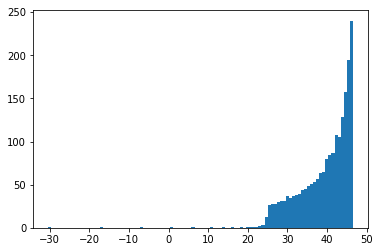

In [7]:
# plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in model(x_data).data]))
plt.hist([i[0][0][0][0][0] for i in chain if i[1]], bins=100)
np.mean([i[0][0][0][0][0] for i in chain if i[1]])

466.94113

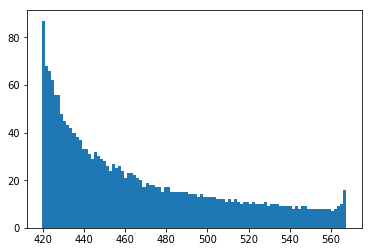

In [8]:
plt.hist([i[0][0][1][0] for i in chain if i[1]], bins=100)

np.mean([i[0][0][1][0] for i in chain if i[1]])

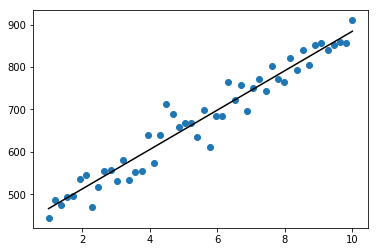

In [9]:
plt.scatter(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in y_data.data]))
plt.plot(np.array([i[0] for i in x_data.data]), np.array([i[0] for i in model(x_data).data]), c='k')
